In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "uniform_sampler"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.083162,-0.044642,0.091988,-0.104512,-0.021059,0.136428,-0.097966,0.073285,0.007068,0.076762,38.678060
1,0.076296,-0.044642,0.065613,-0.092871,0.072874,-0.072196,-0.016354,0.099141,-0.073889,0.025351,61.187490
2,0.016357,-0.044642,-0.005834,-0.021439,-0.029802,-0.002549,0.130464,0.170923,0.122687,-0.079642,105.924584
3,-0.093092,-0.044642,0.050102,-0.066268,-0.073437,0.197070,0.092439,0.180104,-0.053318,0.019467,92.767569
4,-0.092916,0.050680,0.049314,0.001016,0.110412,-0.051614,-0.028360,-0.037670,-0.066982,-0.047003,313.548946
5,-0.071236,-0.044642,0.123458,0.066053,0.050665,0.162448,0.075922,-0.058842,-0.045430,0.018461,117.031583
6,-0.012975,-0.044642,0.066374,-0.042331,0.043724,0.104636,-0.015145,0.112175,-0.071935,-0.037381,300.790891
7,-0.021384,0.050680,-0.048544,-0.077265,0.110713,0.027874,-0.019182,0.120654,0.056747,-0.078553,236.335377
8,-0.008485,-0.044642,-0.009577,0.050495,0.123592,0.189684,-0.021479,0.110038,-0.056693,0.060591,156.752856
9,-0.082032,0.050680,0.121332,0.030361,-0.059120,-0.074210,0.002959,0.146530,-0.054647,-0.012758,331.276936


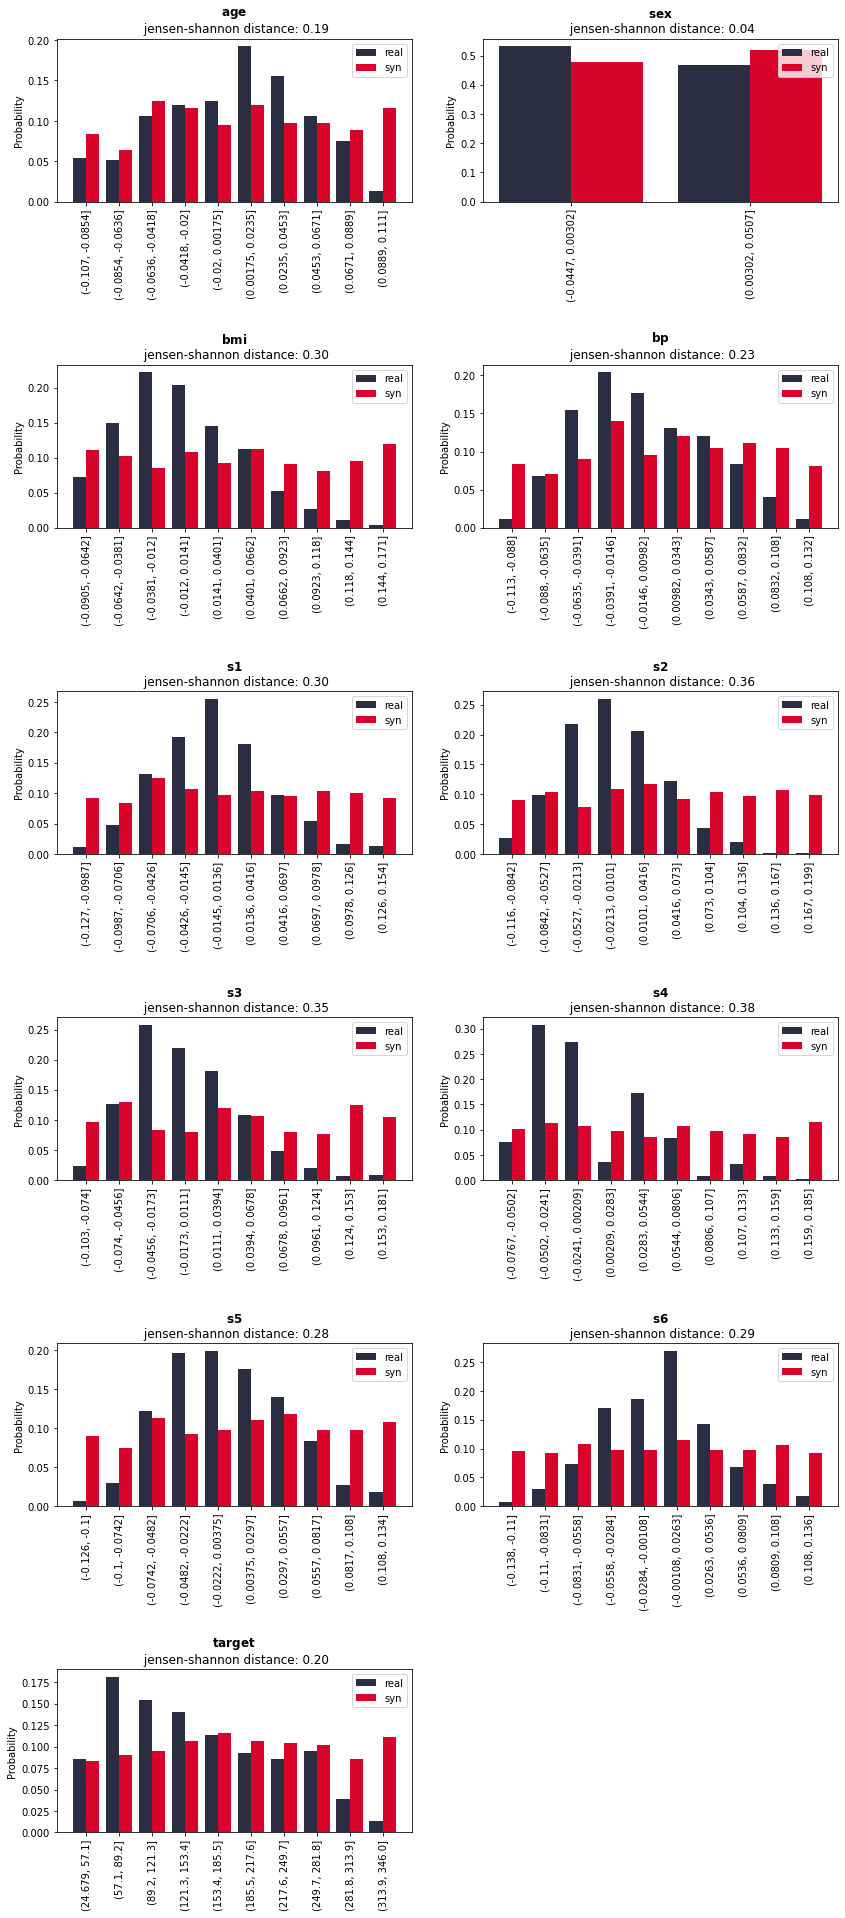

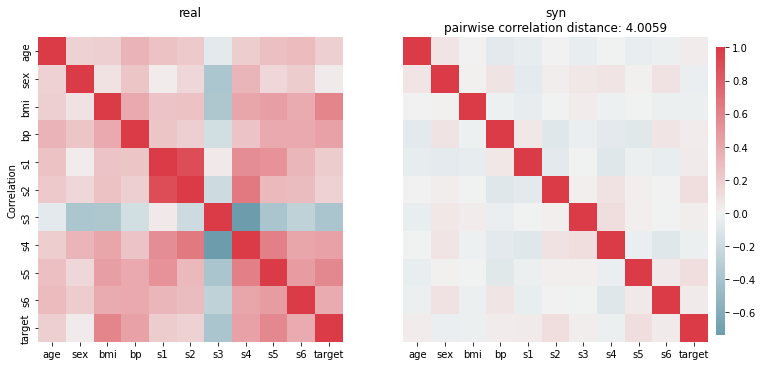

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : uniform_sampler


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.00
sanity.common_rows_proportion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.01
sanity.nearest_syn_neighbor_distance,0.158164,0.172774,0.165715,0.005975,0.166206,0.007305,3,0,0.01
sanity.inlier_probability,0.717195,0.755656,0.732278,0.016762,0.723982,0.019231,3,0,0.01
sanity.outlier_probability,0.004525,0.013575,0.007541,0.004266,0.004525,0.004525,3,0,0.01
statistical.marginal.jensenshannon_distance,0.273167,0.279824,0.276477,0.002718,0.276440,0.003328,3,0,0.17
statistical.marginal.chi_squared_test,0.995840,0.998128,0.996893,0.000943,0.996712,0.001144,3,0,0.02
statistical.joint.feature_correlation,3.923653,4.004797,3.951698,0.037566,3.926646,0.040572,3,0,0.14
statistical.marginal.inverse_cdf_distance,0.140936,0.146741,0.143817,0.002370,0.143775,0.002902,3,0,4.55
statistical.marginal.inverse_kl_divergence,0.767002,0.776658,0.772741,0.004147,0.774564,0.004828,3,0,0.02
